# MTH8211: Algèbre linéaire numérique appliquée

### Laboratoire 2: Méthodes directes

Alexis Montoison, Geoffroy Leconte 

## I) Revue et utilisation des principales factorisations matricielles

Un système (S) de $m$ équations linéaires à $n$ inconnues $x_1$, $\cdots$, $x_n$ :
<br/><br/>
$$(S) \left\{\begin{matrix}
a_{1,1}x_1 + \dots + a_{1,n}x_n = b_1 \\
\phantom{a_{1,1}x_1 +} \vdots \phantom{\dots + a_{1,n}x_n =} \vdots \\
a_{m,1}x_1 + \dots + a_{m,n}x_n = b_m\end{matrix}\right.$$
<br/>

On peut reformuler (S) sous la forme d'une équation matricielle $Ax = b$ :
<br/><br/>
$$A=\begin{pmatrix}
a_{1,1} & \cdots & a_{1,n} \\
\vdots & \ddots & \vdots \\
a_{m,1} & \cdots & a_{m,n} \end{pmatrix}, \quad x=\begin{pmatrix} x_1 \\ \vdots \\ x_n \end{pmatrix}\quad\text{et}\quad b=\begin{pmatrix} b_1 \\ \vdots \\ b_m \end{pmatrix}$$
<br/>

Il existe différents types de systèmes linéaires:
+ $Ax = b~~~~~$ Systèmes carrés
<br/><br/>
+ $\begin{bmatrix} M & A \\ A^T & 0 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} b \\ c \end{bmatrix}~~~~~$ Systèmes de point de selle ($M \succ 0$)
<br/><br/>
+ $\begin{bmatrix} M & \phantom{-}A \\ A^T & -N \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} b \\ c \end{bmatrix}~~~~~$ Systèmes symétriques quasi-définis ($M \succ 0$ et $N \succ 0$)
<br/><br/>
+ $\min\limits_{x \in \mathbb{R}^n} \|Ax - b\|~~~~~$ Problèmes de moindres carrés
<br/><br/>
+ $\min\limits_{x \in \mathbb{R}^n} \|x\|~\text{ s.c. }~Ax = b~~~~~$ Problèmes de moindre norme
<br/><br/>
+ $Ax = b ~~~~~\text{et}~~~~~ A^T y = c~~~~~$ Systèmes adjoints

En fonction du type de système linéaire que l'on va résoudre (problèmes de moindres carrés, problèmes de moindre norme, ...), de la structure (carré, rectangulaire, creux, dense, etc...) et des caractéristiques (symétrique, défini positif, ...) on va adapter la factorisation.

**Question** : Est-ce que déterminer $A^{-1}$ et faire le produit $A^{-1} b$ est pertinent pour résoudre un système carré $Ax = b$ ?

**Remarque** : On a besoin de déterminer une décomposition de $A$ une seule fois même si on résout plusieurs systèmes.

### Factorisation LU

Décomposition de A en un produit de deux matrices triangulaires $L$ et $U$.
<br/><br/>
$$A \in \mathbb{R}^{n \times n},~L \in \mathbb{R}^{n \times n} \text{ et } U \in \mathbb{R}^{n \times n}$$
<br/><br/>
$$L=\begin{pmatrix}
l_{1,1} & 0 & \cdots & 0 \\
\vdots & \ddots & \ddots & \vdots \\
\vdots & & \ddots & 0 \\
l_{n,1} & \cdots & \cdots & l_{n,n} \end{pmatrix}
\quad\text{et}\quad
U=\begin{pmatrix}
u_{1,1} & \cdots & \cdots & u_{1,n} \\
0 & \ddots & & \vdots \\
\vdots & \ddots & \ddots & \vdots \\
0 & \cdots & 0 & u_{n,n} \end{pmatrix}$$
<br/><br/>
$$Ax = b \Longleftrightarrow LU x = b \Longleftrightarrow \left\{\begin{matrix} Ly = b \\ Ux = y\end{matrix}\right.$$
<br/><br/>
La factorisation n'existe pas toujours sans permutation, même si $A$ est inversible. En pratique on fait la factorisation $PA = LU$ qui existe si $A$ est inversible.

In [1]:
using LinearAlgebra

In [2]:
A = rand(10, 10)
b = ones(10)
F = lu(A);
x = F \ b;
norm(A*x - b)

1.4383281002407285e-14

**Exercice** : À l'aide de la factoration $LU$ avec pivotage de $A$, décrire une méthode permettant de résoudre un système adjoint $Ax = b$ et $A^T y = c$.

### Factorisations de Cholesky, $\mathbf{LDL^T}$ et de Bunch–Kaufman

Lorsque $A$ est symétrique et définie positive alors on peut simplifier la factorisation afin d'obtenir $A=LL^T$. Il s'agit de la factorisation de _Cholesky_.

**Exercice** : Est-ce que la factorisation $A=LL^T$ est un cas particulier de la décomposition $LU$ ? Est-ce que la complexité en temps et en mémoire est différente ?

Lorsque $A$ est symétrique et indéfinie, on fait la décomposition _$LDL^T$_ ($D$ est une matrice diagonale) ou de _Bunch–Kaufman_ ($D$ est une matrice bloc-diagonale).

In [3]:
A = rand(10, 10)
As = A' * A
b = ones(10);

**Question**: Pourquoi As est symétrique définie positive?

In [4]:
F = cholesky(As)
println(norm(As * (F \ b) - b))
F = cholesky(Symmetric(As, :L))
println(norm(As * (F \ b) - b))
F = cholesky(Symmetric(tril(As), :L)) # factorisation avec matrice d'entrée qui stocke uniquement le triangle inférieur
println(norm(As * (F \ b) - b))
F

2.49399488080602e-13
1.632702903446565e-13
1.632702903446565e-13


Cholesky{Float64, Matrix{Float64}}
L factor:
10×10 LowerTriangular{Float64, Matrix{Float64}}:
 1.75137    ⋅           ⋅          ⋅         …   ⋅          ⋅         ⋅ 
 1.12663   1.12765      ⋅          ⋅             ⋅          ⋅         ⋅ 
 1.54697  -0.0501646   1.07677     ⋅             ⋅          ⋅         ⋅ 
 1.55188   1.114       0.146483   0.838924       ⋅          ⋅         ⋅ 
 1.26635   1.33617    -0.214695   0.0228261      ⋅          ⋅         ⋅ 
 1.42796   0.267457    0.231518   0.412485   …   ⋅          ⋅         ⋅ 
 1.43875   0.281885    0.127041   0.184754       ⋅          ⋅         ⋅ 
 1.05139   0.442636   -0.073445   0.329943      0.517383    ⋅         ⋅ 
 1.57991   0.502362    0.621384   0.351751      0.158919   0.429309   ⋅ 
 1.47686   1.25725     0.306452  -0.300475      0.394027  -0.039492  0.080577

In [5]:
F = bunchkaufman(As)

BunchKaufman{Float64, Matrix{Float64}, Vector{Int64}}
D factor:
10×10 Tridiagonal{Float64, Vector{Float64}}:
 0.00781361  0.0         ⋅        …   ⋅        ⋅         ⋅        ⋅ 
 0.0         0.0552509  0.0           ⋅        ⋅         ⋅        ⋅ 
  ⋅          0.0        0.497231      ⋅        ⋅         ⋅        ⋅ 
  ⋅           ⋅         0.0           ⋅        ⋅         ⋅        ⋅ 
  ⋅           ⋅          ⋅            ⋅        ⋅         ⋅        ⋅ 
  ⋅           ⋅          ⋅        …  0.0       ⋅         ⋅        ⋅ 
  ⋅           ⋅          ⋅           1.07853  0.0        ⋅        ⋅ 
  ⋅           ⋅          ⋅           0.0      0.693237  0.0       ⋅ 
  ⋅           ⋅          ⋅            ⋅       0.0       1.35245  0.0
  ⋅           ⋅          ⋅            ⋅        ⋅        0.0      4.4312
U factor:
10×10 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  -0.204291  0.764367  -1.13567    …   0.265169   0.716023    0.583708
  ⋅    1.0       0.010534   0.0721674      0.15978    0.1505

### Factorisation QR

Décomposition de $A$ de rang plein en un produit d'une matrice orthogonale $Q$ et d'une matrice trapézoïdale supérieure $R$.
<br/><br/>
$$A \in \mathbb{R}^{m \times n}~(m > n),~Q \in \mathbb{R}^{m \times m} \text{ et } R \in \mathbb{R}^{m \times n}$$
<br/><br/>
$$QQ^T = Q^T Q = I_m 
\quad\text{et}\quad
R=\begin{pmatrix} \widetilde{R} \\ 0 \end{pmatrix} \quad\text{avec}\quad
\widetilde{R} = \begin{pmatrix}
r_{1,1} & \cdots & \cdots & r_{1,n} \\
0 & \ddots & & \vdots \\
\vdots & \ddots & \ddots & \vdots \\
0 & \cdots & 0 & r_{n,n} \\
\end{pmatrix}$$
<br/><br/>
$$\min\limits_{x \in \mathbb{R}^n} \|Ax - b\| \Longleftrightarrow \min\limits_{x \in \mathbb{R}^n} \|QRx - b\| \Longleftrightarrow \min\limits_{x \in \mathbb{R}^n} \|Rx - Q^T b\| \Longleftrightarrow \left\{\begin{matrix} z = Q^T b \\ \widetilde{R}x = z_{1:n} \end{matrix}\right.$$

In [6]:
A = rand(10, 8)
F = qr(A)

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}, Matrix{Float64}}
Q factor:
10×10 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}:
 -0.36306     0.168438   -0.139595   …   0.496185   0.151252  -0.218656
 -0.489459   -0.12259    -0.180939      -0.249993  -0.397585   0.238889
 -0.0682066   0.764389   -0.108765       0.164681  -0.091547  -0.300869
 -0.233981    0.30887     0.13597       -0.159135  -0.372433   0.0147714
 -0.203687    0.052779    0.102332      -0.140562  -0.379645   0.0970932
 -0.175553   -0.0432047  -0.820853   …  -0.295735   0.140872  -0.094469
 -0.492541   -0.215665    0.346796      -0.310369   0.344107  -0.582756
 -0.393838    0.133043    0.296833       0.087365   0.169951   0.455376
 -0.135647    0.248882   -0.0690905     -0.115949   0.590677   0.484693
 -0.284264   -0.382234   -0.141545       0.643614  -0.108599   0.0642758
R factor:
8×8 Matrix{Float64}:
 -1.85098  -1.79536  -1.02126    …  -1.54764   -1.91446    -1.60582
  0.0       1.10461   

### Factorisation LQ

Décomposition de $A$ de rang plein en un produit d'une matrice trapézoïdale inférieure $L$ et d'une matrice orthogonale $Q$. On peut l'obtenir avec la factorisation $QR$ de $A^T$.
<br/><br/>
$$A \in \mathbb{R}^{m \times n}~(m < n),~L \in \mathbb{R}^{m \times n} \text{ et } Q \in \mathbb{R}^{n \times n}$$
<br/><br/>
$$L=\begin{pmatrix} \widetilde{L} & 0 \end{pmatrix} \quad\text{avec}\quad
\widetilde{L} =\begin{pmatrix}
l_{1,1} & 0 & \cdots & 0 \\
\vdots & \ddots & \ddots & \vdots \\
\vdots & & \ddots & 0 \\
l_{m,1} & \cdots & \cdots & l_{m,m} \end{pmatrix}
\quad\text{et}\quad
QQ^T = Q^T Q = I_n$$
<br/><br/>
$$\min\limits_{x \in \mathbb{R}^n} \|x\|~\text{ s.c. }~Ax = b \Longleftrightarrow \min\limits_{x \in \mathbb{R}^n} \|x\|~\text{ s.c. }~LQx = b \Longleftrightarrow \left\{\begin{matrix} \widetilde{L}~y_{1:m} = b \\ y_{m+1:n} = 0 \\ x = Q^T y \end{matrix} \right.$$

In [7]:
A = rand(8, 10)
F = lq(A)

LQ{Float64, Matrix{Float64}, Vector{Float64}}
L factor:
8×8 Matrix{Float64}:
 -2.04545   0.0        0.0        …   0.0        0.0       0.0
 -1.34961   1.01715    0.0            0.0        0.0       0.0
 -1.90738   0.251891  -0.963008       0.0        0.0       0.0
 -1.55141   0.102695  -0.20907        0.0        0.0       0.0
 -0.908577  0.667933  -0.628645       0.0        0.0       0.0
 -1.55959   0.485399  -0.159618   …  -0.777231   0.0       0.0
 -1.26667   0.523205  -0.229473      -0.32888    0.184717  0.0
 -1.1551    0.504346  -0.0389676      0.0581672  0.330793  0.772041
Q factor:
10×10 LinearAlgebra.LQPackedQ{Float64, Matrix{Float64}, Vector{Float64}}:
 -0.191724   -0.363839   -0.451086   …  -0.391349   -0.186743   -0.182352
  0.591761   -0.28416    -0.351564      -0.207104    0.113446    0.320135
  0.409304    0.289481   -0.0573404      0.120969    0.0219604  -0.458747
 -0.114262    0.442643    0.270553      -0.440947   -0.537998    0.213758
 -0.378237    0.212715   -0.168799

**Exercice** : Trouver un moyen de faire une factorisation _QLP_ afin de résoudre le problème :
<br/><br/>
$$\min\limits_{x \in \mathbb{R}^n} \|x\|~\text{ s.c. }~x \in \mathop{\text{argmin}} \|b- Ax\|, \quad A \in \mathbb{R}^{m \times n}, \quad m \ge n.$$

### SVD

$$A = U \Sigma V^T, \quad A \in \mathbb{R}^{m \times n}, U \in \mathbb{R}^{n \times n}, V \in \mathbb{R}^{m \times m}, \Sigma \in \mathbb{R}^{m \times n}$$
avec $U$ et $V$ orthogonales,
    $$ \Sigma = \begin{bmatrix} \tilde \Sigma \\ 0 \end{bmatrix}, \quad \tilde \Sigma = \mathrm{diag} ( \sigma_1, ..., \sigma_{\min(m, n)}), \quad \sigma_i \ge 0, \quad  \sigma_1 \ge ... \ge \sigma_r > 0, \quad \sigma_{r+1} = ... = \sigma_{\min(m, n)} = 0, \quad r = \mathrm{rank}(A)$$
    
    
$$\min\limits_{x \in \mathbb{R}^n} \|Ax - b\| \Longleftrightarrow \min\limits_{x \in \mathbb{R}^n} \|\Sigma V^T x - U^T b\| 
\Longleftrightarrow \min\limits_{x \in \mathbb{R}^n} \|\Sigma y - U^T b\|, \quad y = V^T x$$

$y_i = \sigma_i^{-1} u_i^T b$, puis
$$x = Vy = \sum_{i=1}^n y_i v_i = \sum_{i=1}^n \sigma_i^{-1} v_i u_i^T b.$$

In [8]:
A = rand(10, 8)
F = svd(A)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
10×8 Matrix{Float64}:
 -0.297523  -0.320038  -0.412974   …  -0.143694   -0.33082    -0.395047
 -0.318333  -0.696102   0.20221       -0.107473    0.338363   -0.192604
 -0.284417   0.351778  -0.214081      -0.119242   -0.171475    0.116293
 -0.316479   0.200848   0.296055      -0.282754   -0.528575   -0.25883
 -0.224728   0.345281  -0.150166       0.487685    0.361038   -0.441631
 -0.407745   0.172625   0.0560312  …   0.0728615   0.041441   -0.14687
 -0.412934  -0.157958  -0.499461       0.207716   -0.0491838   0.580281
 -0.2356    -0.118379   0.486882       0.647171   -0.260515    0.124505
 -0.289602   0.223386   0.02563       -0.276138    0.492593   -0.0303145
 -0.320066   0.105094   0.377123      -0.303741    0.149238    0.395687
singular values:
8-element Vector{Float64}:
 4.829526649843607
 1.2760091340730253
 0.9899751503301157
 0.8427705135913678
 0.6308392994499435
 0.4458760742638746
 0.40859086576234627
 0.260548

### II) Librairies numériques pour les factorisations

Dans le langage Julia, les opérations d'algèbre linéaire dense sont basées sur la bibliothèque LAPACK, qui à son tour exploite la librairie d'algèbre linéaire de base connus sous le nom de BLAS. Il existe des implémentations hautement optimisées de BLAS, dévelopées pour tirer profit de l'architecture du processeur.

LinearAlgebra.BLAS et LinearAlgebra.LAPACK fournissent une interface directe aux fonctions de BLAS et LAPACK. Les fonctions de BLAS ou LAPACK ont généralement quatre méthodes associées aux types Float32, Float64, ComplexF32 et ComplexF64.

Pour les opérations d'algèbre linéaire creuse, Julia utilise les algorithmes de [SuiteSparse](https://people.engr.tamu.edu/davis/suitesparse.html), on peut notamment citer **UMFPACK** et **CHOLMOD**, fonctions permettant respectivement de faire les factorisations $LU$ et $LL^T$ des matrices creuses.

Il existe d'autres logiciels permettant la résolution de systèmes linéaires denses et creux, la plupart possède des interfaces en Julia ([HSL.jl](https://github.com/JuliaSmoothOptimizers/HSL.jl), [Pardiso.jl](https://github.com/JuliaSparse/Pardiso.jl), [MUMPS.jl](https://github.com/JuliaSmoothOptimizers/MUMPS.jl), etc...) ou une implémentation en Julia ([LDLFactorizations.jl](https://github.com/JuliaSmoothOptimizers/LDLFactorizations.jl)).

**Exemple de factorisation creuse avec LDLFactorizations.jl**

In [9]:
# ]add LDLFactorizations

In [10]:
using LDLFactorizations, SparseArrays
A = sprand(10, 10, 0.2)
As = A' * A + I
b = rand(10);

In [11]:
Au = Symmetric(triu(As), :U) # optimisé avec matrice symétrique où seul le triangle supérieur est stocké

10×10 Symmetric{Float64, SparseMatrixCSC{Float64, Int64}}:
 1.81259   0.0      0.743097  0.0       …  0.0        0.0      0.821041
 0.0       1.07128  0.0       0.0          0.0        0.0      0.0
 0.743097  0.0      1.707     0.0          0.0        0.0      0.750825
 0.0       0.0      0.0       1.12343      0.0        0.0      0.0
 0.0       0.0      0.0       0.268891     0.0        0.64883  0.0
 0.675049  0.0      0.617317  0.0       …  0.0        0.0      0.789107
 0.0       0.0      0.148399  0.0          0.0        0.0      0.0
 0.0       0.0      0.0       0.0          1.53709    0.0      0.0651575
 0.0       0.0      0.0       0.0          0.0        1.50608  0.0
 0.821041  0.0      0.750825  0.0          0.0651575  0.0      2.08437

In [12]:
F = ldl(Au)
println(norm(Au * (F \ b) - b))

9.639819490876586e-17


In [13]:
# fonction ldiv! : résout Au x = b et stocke le résultat dans un x préalloué
x = zeros(10)
ldiv!(x, F, b)
println(norm(Au * x - b))

9.639819490876586e-17


### III) Collection de systèmes linéaires

La [Suite Sparse Matrix Collection](https://sparse.tamu.edu/) (anciennement UFL collection) regroupe environ 3000 problèmes venant de multiples domaines et de tailles diverses. La collection est couramment utilisée comme référence dans les articles scientifiques. Elle permet de facilement tester de nouvelles implémentations de méthodes directes ou itératives.
<br/><br/>
Chaque problème est stocké dans le format *MatrixMarket* (.mtx), *MAT* (.mat) et *Rutherford-Boeing* (.rb). Une interface directe à la SSMC existe en Julia.

In [14]:
# ]add SuiteSparseMatrixCollection, HarwellRutherfordBoeing, MatrixMarket, MAT

In [15]:
using SuiteSparseMatrixCollection
using HarwellRutherfordBoeing
using MatrixMarket
using MAT

In [16]:
# Matrices réelles symétriques et définies positives de taille 100 au maximum
ssmc = ssmc_db()
tiny = ssmc[(ssmc.numerical_symmetry .== 1) .& (ssmc.positive_definite.== true) .& 
            (ssmc.real .== true) .& (ssmc.nrows .≤ 100), :]

# Téléchargement des matrices au format MatrixMarket 
paths = fetch_ssmc(tiny, format="MM") # "mat" et "RB" pour les autres formats
downloaded_matrices = installed_ssmc()

# Informations sur les matrices
tiny[!, [:name, :nrows, :ncols, :positive_definite, :lower_bandwidth]]

┌ Info: loaded database with revision date
│   last_rev_date = 08-Oct-2020 17:09:58
└ @ SuiteSparseMatrixCollection /Users/guillaumethibault/.julia/packages/SuiteSparseMatrixCollection/pNX0b/src/SuiteSparseMatrixCollection.jl:25


,name,nrows,ncols,positive_definite,lower_bandwidth
,String,Int64,Int64,Bool,Int64
1,bcsstk01,48,48,1,35
2,bcsstk02,66,66,1,65
3,bcsstm02,66,66,1,0
4,nos4,100,100,1,13
5,ex5,27,27,1,20
6,mesh1e1,48,48,1,47
7,mesh1em1,48,48,1,47
8,mesh1em6,48,48,1,47
9,LF10,18,18,1,3


In [17]:
paths[1]

"/Users/guillaumethibault/.julia/artifacts/aed50c210fa42e6390a81908dc4f24f9b638ff14/bcsstk01"

In [18]:
# Informations sur la matrice dwt_592
pb = ssmc_matrices(tiny, "", "LFAT5")

# Téléchargement de la matrice dwt_592
path2 = fetch_ssmc(pb, format="MM")

# Emplacement de la matrice dwt_592
path_mtx = path2[1]

# Lecture de la matrice
dwt_592 = MatrixMarket.mmread(joinpath(path_mtx, "LFAT5.mtx"))

14×14 SparseMatrixCSC{Float64, Int64} with 46 stored entries:
   1.57088    ⋅           ⋅        …       ⋅        ⋅         ⋅ 
    ⋅        1.25664e7    ⋅                ⋅        ⋅         ⋅ 
    ⋅         ⋅          0.608806          ⋅        ⋅         ⋅ 
 -94.2528     ⋅           ⋅                ⋅        ⋅         ⋅ 
   0.78544    ⋅           ⋅                ⋅        ⋅         ⋅ 
    ⋅       -6.2832e6     ⋅        …       ⋅        ⋅         ⋅ 
    ⋅         ⋅         -0.304403          ⋅        ⋅         ⋅ 
    ⋅         ⋅           ⋅           -7540.22    94.2528     ⋅ 
    ⋅         ⋅           ⋅             -94.2528   0.78544    ⋅ 
    ⋅         ⋅           ⋅                ⋅        ⋅         ⋅ 
    ⋅         ⋅           ⋅        …       ⋅        ⋅         ⋅ 
    ⋅         ⋅           ⋅           15080.4       ⋅       94.2528
    ⋅         ⋅           ⋅                ⋅       3.14176   0.78544
    ⋅         ⋅           ⋅              94.2528   0.78544   1.57088

### IV) Heuristiques de renumérotation de degrés de liberté pour limiter le remplissage

Les méthodes directes ont deux principaux défauts. La complexité temporelle est le premier défaut avec $\mathcal{O}(n^3)$ opérations pour des matrices carrées denses où $n$ est la dimension de la matrice. Le second défaut est le coût mémoire nécessaire au stockage des facteurs de la décomposition. Ces derniers peuvent être denses même si la matrice est creuse. Afin de limiter ce phénomène de "fill-in" on utilise des heuristiques de renumérotation de degrés de liberté qui ont pour but de réduire la largeur de bande de la matrice (Cuthill–McKee ou Reverse Cuthill–McKee) ou le nombre de coefficients non nuls lors d'une factorisation (AMD, COLAMD, METIS, etc...).

In [19]:
# ]add AMD, Metis, SymRCM, UnicodePlots

In [20]:
using AMD
using Metis
using SymRCM
using UnicodePlots

In [21]:
M = dwt_592 * dwt_592'
F = lu(Matrix(M), Val(false))
spy(M)

      ┌───────┐    
    1 │⠢⡐⠢⡐⠢⡀⠀│ > 0
      │⠣⡘⠣⡘⠣⡘⠃│ < 0
      │⠣⡘⠣⡘⠣⡘⠛│    
   14 │⠀⠘⠃⠸⠇⠸⠿│    
      └───────┘    
      ⠀1⠀⠀⠀⠀14⠀    
      ⠀⠀72 ≠ 0⠀    

In [22]:
spy(sparse(F.L))

      ┌───────┐    
    1 │⠢⡀⠀⠀⠀⠀⠀│ > 0
      │⠣⡘⠢⡀⠀⠀⠀│ < 0
      │⠣⡘⠣⡘⠢⡀⠀│    
   14 │⠀⠘⠃⠸⠇⠸⠦│    
      └───────┘    
      ⠀1⠀⠀⠀⠀14⠀    
      ⠀⠀43 ≠ 0⠀    

In [23]:
p1 = amd(M)
F1 = lu(Matrix(M[p1, p1]), Val(false))
spy(M[p1, p1])

      ┌───────┐    
    1 │⣶⡆⣴⣦⠀⠀⠀│ > 0
      │⣴⣾⣿⣿⠀⠀⠀│ < 0
      │⠈⠉⠉⠉⣶⡆⠀│    
   14 │⠀⠀⠀⠀⠀⠸⠿│    
      └───────┘    
      ⠀1⠀⠀⠀⠀14⠀    
      ⠀⠀72 ≠ 0⠀    

In [24]:
spy(sparse(F1.L))

      ┌───────┐    
    1 │⣦⡀⠀⠀⠀⠀⠀│ > 0
      │⣴⣾⣦⡀⠀⠀⠀│ < 0
      │⠈⠉⠉⠉⣦⡀⠀│    
   14 │⠀⠀⠀⠀⠀⠸⠦│    
      └───────┘    
      ⠀1⠀⠀⠀⠀14⠀    
      ⠀⠀43 ≠ 0⠀    

In [25]:
p2 = symrcm(M)
F2 = lu(Matrix(M[p2, p2]), Val(false))
spy(M[p2, p2])

      ┌───────┐    
    1 │⣶⣶⣦⡄⠀⠀⠀│ > 0
      │⢻⣿⣿⣿⠀⠀⠀│ < 0
      │⠀⠈⠉⠉⣶⡆⠀│    
   14 │⠀⠀⠀⠀⠀⠸⠿│    
      └───────┘    
      ⠀1⠀⠀⠀⠀14⠀    
      ⠀⠀72 ≠ 0⠀    

In [26]:
spy(sparse(F2.L))

      ┌───────┐    
    1 │⣦⡀⠀⠀⠀⠀⠀│ > 0
      │⢻⣿⣦⡀⠀⠀⠀│ < 0
      │⠀⠈⠉⠉⣦⡀⠀│    
   14 │⠀⠀⠀⠀⠀⠸⠦│    
      └───────┘    
      ⠀1⠀⠀⠀⠀14⠀    
      ⠀⠀43 ≠ 0⠀    

In [27]:
p3, _ = Metis.permutation(M)
F3 = lu(Matrix(M[p3, p3]), Val(false))
spy(M[p3, p3])

      ┌───────┐    
    1 │⣢⣦⣔⣲⠀⠀⠀│ > 0
      │⡜⣿⣿⣿⠀⠀⠀│ < 0
      │⠉⠉⠉⠉⣶⡆⠀│    
   14 │⠀⠀⠀⠀⠀⠸⠿│    
      └───────┘    
      ⠀1⠀⠀⠀⠀14⠀    
      ⠀⠀72 ≠ 0⠀    

In [28]:
spy(sparse(F3.L))

      ┌───────┐    
    1 │⣢⡀⠀⠀⠀⠀⠀│ > 0
      │⡜⣿⣦⡀⠀⠀⠀│ < 0
      │⠉⠈⠉⠉⣦⡀⠀│    
   14 │⠀⠀⠀⠀⠀⠸⠦│    
      └───────┘    
      ⠀1⠀⠀⠀⠀14⠀    
      ⠀⠀42 ≠ 0⠀    

### V) Analyse symbolique pour les factorisations de matrices creuses

On peut souvent décomposer les factorisations creuses en deux étapes:

- Une étape qui va déterminer la position des éléments non nuls sur les facteurs (analyse symbolique)
- Une étape qui va déterminer la valeur des éléments non nuls sur les facteurs

Avantage: Si deux matrices ont des éléments non nuls au même endroit (mais pas forcément avec des valeurs indentiques), on peut effectuer une seule fois l'analyse symbolique pour ces deux matrices.

**Exemple avec LDLFactorizations**

In [29]:
A = sprand(10, 10, 0.2)
As = A' * A + I
Asu = Symmetric(triu(As), :U) # même matrice que As mais avec le triangle supérieur seul et dans le "wrapper" Symmetric
Asu.data # matrice triangulaire supérieur à l'intérieur du "wrapper"

10×10 SparseMatrixCSC{Float64, Int64} with 34 stored entries:
 1.00987   ⋅       ⋅        ⋅         ⋅        …   ⋅           ⋅    ⋅ 
  ⋅       1.7121   ⋅       0.225504  0.369304      ⋅           ⋅   0.0734889
  ⋅        ⋅      1.82406  0.295478  0.222595     0.133284     ⋅    ⋅ 
  ⋅        ⋅       ⋅       2.0197    0.319019     0.198891     ⋅   0.171691
  ⋅        ⋅       ⋅        ⋅        1.99973      0.143903     ⋅   0.00390102
  ⋅        ⋅       ⋅        ⋅         ⋅        …   ⋅           ⋅   0.0589623
  ⋅        ⋅       ⋅        ⋅         ⋅           0.00942128   ⋅   0.0033844
  ⋅        ⋅       ⋅        ⋅         ⋅           1.2041       ⋅   0.334541
  ⋅        ⋅       ⋅        ⋅         ⋅            ⋅          1.0   ⋅ 
  ⋅        ⋅       ⋅        ⋅         ⋅            ⋅           ⋅   2.0294

In [30]:
F = ldl_analyze(Asu)
F.L # F contient des entrées non nuls initialisées à une valeur arbitraire

10×10 SparseMatrixCSC{Float64, Int64} with 24 stored entries:
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 

In [31]:
ldl_factorize!(Asu, F)
display(F.L)
display(F.D)

10×10 SparseMatrixCSC{Float64, Int64} with 24 stored entries:
  ⋅    ⋅          ⋅           ⋅          …   ⋅           ⋅           ⋅ 
  ⋅    ⋅          ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅    ⋅          ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅    ⋅         0.07307      ⋅              ⋅           ⋅           ⋅ 
  ⋅    ⋅          ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅    ⋅         0.161989    0.148448    …   ⋅           ⋅           ⋅ 
  ⋅    ⋅         0.122033    0.106867        ⋅           ⋅           ⋅ 
  ⋅   0.0236319   ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅    ⋅         0.00972226  0.00680316     0.113774     ⋅           ⋅ 
  ⋅    ⋅          ⋅          0.280099       0.0184534  -0.00219602   ⋅ 

10×10 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅        ⋅        ⋅        ⋅      …   ⋅        ⋅        ⋅       ⋅ 
  ⋅   1.00987   ⋅        ⋅        ⋅          ⋅        ⋅        ⋅       ⋅ 
  ⋅    ⋅       1.82406   ⋅        ⋅          ⋅        ⋅        ⋅       ⋅ 
  ⋅    ⋅        ⋅       1.19437   ⋅          ⋅        ⋅        ⋅       ⋅ 
  ⋅    ⋅        ⋅        ⋅       1.7121      ⋅        ⋅        ⋅       ⋅ 
  ⋅    ⋅        ⋅        ⋅        ⋅      …   ⋅        ⋅        ⋅       ⋅ 
  ⋅    ⋅        ⋅        ⋅        ⋅         1.85505   ⋅        ⋅       ⋅ 
  ⋅    ⋅        ⋅        ⋅        ⋅          ⋅       1.56294   ⋅       ⋅ 
  ⋅    ⋅        ⋅        ⋅        ⋅          ⋅        ⋅       1.1104   ⋅ 
  ⋅    ⋅        ⋅        ⋅        ⋅          ⋅        ⋅        ⋅      1.92345

In [32]:
# motifications de la matrice Asu sans changer la position des éléments non nuls
Asu2 = copy(Asu)
Asu2.data.nzval[1] = 10.0
Asu2.data

10×10 SparseMatrixCSC{Float64, Int64} with 34 stored entries:
 10.0   ⋅       ⋅        ⋅         ⋅        …   ⋅           ⋅    ⋅ 
   ⋅   1.7121   ⋅       0.225504  0.369304      ⋅           ⋅   0.0734889
   ⋅    ⋅      1.82406  0.295478  0.222595     0.133284     ⋅    ⋅ 
   ⋅    ⋅       ⋅       2.0197    0.319019     0.198891     ⋅   0.171691
   ⋅    ⋅       ⋅        ⋅        1.99973      0.143903     ⋅   0.00390102
   ⋅    ⋅       ⋅        ⋅         ⋅        …   ⋅           ⋅   0.0589623
   ⋅    ⋅       ⋅        ⋅         ⋅           0.00942128   ⋅   0.0033844
   ⋅    ⋅       ⋅        ⋅         ⋅           1.2041       ⋅   0.334541
   ⋅    ⋅       ⋅        ⋅         ⋅            ⋅          1.0   ⋅ 
   ⋅    ⋅       ⋅        ⋅         ⋅            ⋅           ⋅   2.0294

In [33]:
ldl_factorize!(Asu2, F) # ici on n'a pas fait l'analyse symbolique
display(F.L)
display(F.D)

10×10 SparseMatrixCSC{Float64, Int64} with 24 stored entries:
  ⋅    ⋅           ⋅           ⋅          …   ⋅           ⋅           ⋅ 
  ⋅    ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅    ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅    ⋅          0.07307      ⋅              ⋅           ⋅           ⋅ 
  ⋅    ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅    ⋅          0.161989    0.148448    …   ⋅           ⋅           ⋅ 
  ⋅    ⋅          0.122033    0.106867        ⋅           ⋅           ⋅ 
  ⋅   0.00238652   ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅    ⋅          0.00972226  0.00680316     0.113737     ⋅           ⋅ 
  ⋅    ⋅           ⋅          0.280099       0.0184474  -0.00219505   ⋅ 

10×10 Diagonal{Float64, Vector{Float64}}:
 1.0    ⋅    ⋅        ⋅        ⋅      …   ⋅        ⋅        ⋅        ⋅ 
  ⋅   10.0   ⋅        ⋅        ⋅          ⋅        ⋅        ⋅        ⋅ 
  ⋅     ⋅   1.82406   ⋅        ⋅          ⋅        ⋅        ⋅        ⋅ 
  ⋅     ⋅    ⋅       1.19437   ⋅          ⋅        ⋅        ⋅        ⋅ 
  ⋅     ⋅    ⋅        ⋅       1.7121      ⋅        ⋅        ⋅        ⋅ 
  ⋅     ⋅    ⋅        ⋅        ⋅      …   ⋅        ⋅        ⋅        ⋅ 
  ⋅     ⋅    ⋅        ⋅        ⋅         1.85505   ⋅        ⋅        ⋅ 
  ⋅     ⋅    ⋅        ⋅        ⋅          ⋅       1.56345   ⋅        ⋅ 
  ⋅     ⋅    ⋅        ⋅        ⋅          ⋅        ⋅       1.11041   ⋅ 
  ⋅     ⋅    ⋅        ⋅        ⋅          ⋅        ⋅        ⋅       1.92345

### V) Applications

### 1)

**Exercice** : Donner les conditions d'optimalités (KKT) du problème
<br/><br/>
\begin{array}{rl}
    (P) \ \ \ 
    \displaystyle \min_{x}
    & \tfrac{1}{2} x^{T} Q x + c^{T} x + d\\
    s.t.
    & A x = b
\end{array}
<br/>
sous la forme d'un système linéaire et en déduire la factorisation la plus adaptée si $Q$ est symétrique.

Créer une structure en julia pour stocker le problème, et une fonction qui permet de le résoudre. Vérifier l'implémentation sur un exemple
<br><br/>
Anwser: 
$$ L(x,y) = \frac{1}{2} x^T Q x + c^T + d + y^T (Ax-b) $$

$$ \nabla_x L(x, y) = Qx + c + A^T y $$

$$ \nabla_y L(x, y) = Ax - b $$


We need to solve: 
$$\left[ {\begin{array}{cc}  Q & A^T \\ A & 0 \\ \end{array} } \right] \left[ {\begin{array}{cc}  x \\ y \\ \end{array} } \right] = \left[ {\begin{array}{cc}  -c \\ b \\ \end{array} } \right] 


In [34]:
using LinearAlgebra

struct MyQuadraticModel{T} # utiliser mutable struct au lieu de struct si vous avez besoin de modifier des attributs
    Q::Symmetric{T, Matrix{T}}
    A::Matrix{T}
    c::Vector{T}
    b::Vector{T}
    d::T
    
    # Constructor to init var and check dims
    function MyQuadraticModel(Q::Symmetric{T, Matrix{T}}, A::Matrix, c::Vector{T}, b::Vector{T}, d::Real) where {T}
        n = size(Q, 2)
        @assert (size(Q,1) == n && size(A,2) == n && length(c) == n)
        @assert (size(A, 1) == length(b))
        return new{T}(Q, A, c, b, d)
    end
end

function solve_model(qm::MyQuadraticModel{T}) where {T}
    # Resolution
    Q, A, c, b = qm.Q, qm.A, qm.c, qm.b
    K = [Q A';
         A zeros(size(A, 1), size(A, 1))]
    F = bunchkaufman(K)
    sol = F \ [-c; b]
    x = sol[1:size(Q, 2)]
    y = sol[size(Q, 2) + 1: end]
    return x, y, x' * Q * x / 2 + c'*x + d

end

solve_model (generic function with 1 method)

In [35]:
# Verification
A1 = rand(10,10)
Q = Symmetric(A1*A1', :L)
c = rand(10)
A = rand(8, 10)
b = rand(8)
d = 2.0
qm = MyQuadraticModel(Q, A, c, b, d)
x, y, obj = solve_model(qm)

([0.49420791867288605, 1.8153058046634258, 2.2205697955101447, -1.3299713005826594, -0.640480686120777, -0.4909680744287912, -1.3735874222850337, 0.4517040347079766, -0.5590895088943656, 0.012819981263644803], [-1.9176892357022102, -2.784689031048301, 0.3339368418438359, 0.10231271064058772, -1.7830539086090174, 2.2863174554374606, -0.06328358187344851, 2.923023469424088], 2.431644848037176)

### 2)

L'équation de Poisson $\Delta u = f$ permet de modéliser différents phénomènes physiques comme le champ gravitationnel ou électrostatique causé par une densite de masse ou une distribution de charge. L'équation de Poisson en 2D et en coordonnées polaires est :
$$\frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial u(r, \theta)}{\partial r} \right) + \frac{1}{r^2} \frac{\partial^2 u(r, \theta)}{\partial \theta^2} = f(r, \theta),$$
<br> <br/>
$$(r,\theta) \in (0, R) \times [0, 2\pi),$$
<br> <br/>
$$u(R,\theta) = g(R, \theta), \quad \theta \in [0, 2\pi)$$
<br> <br/>
avec $R > 0$ le rayon du domaine, $f$ le terme de source et $g$ les conditions aux bornes.

In [36]:
# ]add Krylov, Plots, PlotlyJS, Test

In [37]:
using Krylov, Printf, Plots, Test
plotlyjs()

krylov_path = joinpath(dirname(pathof(Krylov)), "..", "test")
include(joinpath(krylov_path, "test_utils.jl"))

function arrangement(x, n, m)
    u = zeros(n, m)
    for i = 1 : n
        for j = 1 : m
            u[i, j] = x[i + (j-1)*n]
        end
    end
  return u
end

function meshgrid(r, θ)
    lr = length(r)
    lθ = length(θ)
    rr = r' .* ones(lθ)
    θθ = ones(lr)' .* θ 
    xx = rr .* cos.(θθ)
    yy = rr .* sin.(θθ)
    return xx, yy
end

meshgrid (generic function with 1 method)

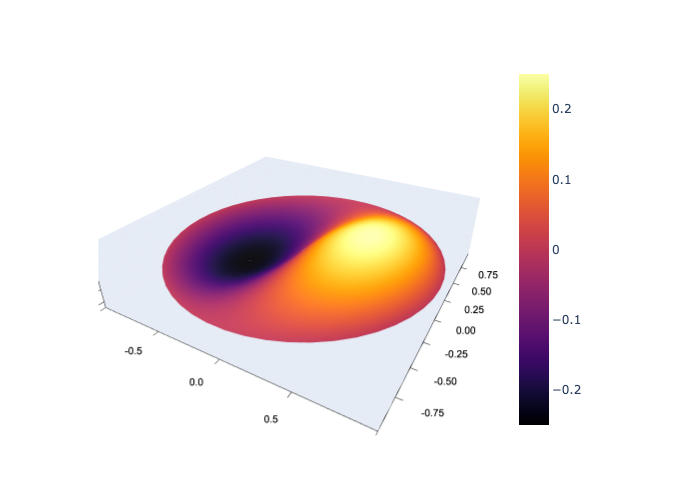

In [38]:
m = 50   # Nombre de subdivision de [0, 2π[
n = 50   # Nombre de subdivision de [O, R[
R = 1.0  # Rayon du domaine

f(r, θ) = -3.0 * cos(θ)  # terme de source
g(r, θ) = 0.0            # conditions aux bornes du domaine

# Discrétisation de l'équation différentielle avec des différences finies
A, b = polar_poisson(n, m, f, g, R=R); # système linéaire de taille nm × nm

Δr = 2 * R / (2*n + 1)
Δθ = 2 * π / m

r = zeros(n+1)
for i = 1 : n+1
    r[i] = (i - 1/2) * Δr
end

θ = zeros(m+1)
for j = 1 : m+1
  θ[j] = (j - 1) * Δθ
end

# Discrétisation du domaine
xx, yy = meshgrid(r, θ)

# Solution après discrétisation de l'EDP
F = lu(A)
x = F \ b
u = arrangement(x, n, m)
u = u'
u = [u; u[1,:]']   # u(r, 0) = u(r, 2π)
u =[u zeros(m+1)]  # u(R, θ) = g(r, θ) = 0

# Solution exacte u(r, θ) = r * (1-r) * cos(θ) 
u_star = [r[i] * (1.0 - r[i]) * cos(θ[j]) for i=1:m+1, j=1:n+1]'

# Affichage de la solution
surface(xx, yy, u)

**Exercice** : Discrétiser l'équation de Poisson en coordonnées cartésiennes
<br><br/><br><br/>
$$\frac{\partial^2 u(x, y)}{\partial x^2} + \frac{\partial^2 u(x, y)}{\partial y^2} = f(x, y)$$
<br><br/>
à  l'aide de la méthode des différences finies sur le domaine $\Omega$ = [0, 1] x [0, 1] avec $f(x,y) = -1$ pour $(x, y) \in \bar{\Omega}$ et $u(x, y) = 0$ pour $(x, y) \in \partial \Omega$.

Résoudre le système linéaire et tracer la solution.
<br><br/>

**Indices** :
<br><br/><br><br/>
$$\frac{\partial^2 u(x_i, y_j)}{\partial x^2} \approx \frac{u(x_{i-1},y_j) - 2 u(x_i, y_j) + u(x_{i+1}, y_j)}{(\Delta x)^2}$$
<br><br/>
$$\frac{\partial^2 u(x_i, y_j)}{\partial y^2} \approx \frac{u(x_i,y_{j-1}) - 2 u(x_i, y_j) + u(x_i, y_{j+1})}{(\Delta y)^2}$$

In [43]:
function cartesian_poisson(n, m, f, g; dim_x=[0.0, 1.0], dim_y=[0.0, 1.0])
  # Ω = ]xₗ,xᵣ[ × ]yₗ,yᵣ[
  # Ω ∪ ∂Ω = [xₗ,xᵣ] × [yₗ,yᵣ]
  xₗ = dim_x[1]
  xᵣ = dim_x[2]

  yₗ = dim_y[1]
  yᵣ = dim_y[2]

  # Uniform grid of Ω with n × m points
  Δx = (xᵣ - xₗ) / (n + 1)
  x = [xₗ + i * Δx for i = 1 : n]

  Δy = (yᵣ - yₗ) / (m + 1)
  y = [yₗ + j * Δy for j = 1 : m]

  A = spzeros(n * m, n * m)
  for i = 1 : n
    for j = 1 : m
      A[i + (j-1)*n, i + (j-1)*n] = - 2.0 / (Δx * Δx) - 2.0 / (Δy * Δy) 
      ### .... compléter avec le reste des valeurs de la ligne i + (j-1) * n
      if i ≥ 2
        A[i + (j-1)*n, i-1 + (j-1)*n] = 1.0 / (Δx * Δx)
      end
      if i ≤ n-1
        A[i + (j-1)*n, i+1 + (j-1)*n] = 1.0 / (Δx * Δx)
      end
      if j ≥ 2
        A[i + (j-1)*n, i + (j-2)*n] = 1.0 / (Δy * Δy)
      end
      if j ≤ m-1
        A[i + (j-1)*n, i + j*n] = 1.0 / (Δy * Δy)
      end
    end
  end

  b = zeros(n * m)
  for i = 1 : n
    for j = 1 : m
      b[i + (j-1)*n] = f(x[i], y[j])
    end
  end

  return A, b
end

cartesian_poisson (generic function with 4 methods)

In [44]:
function meshgrid2(x, y)
    lx = length(x)
    ly = length(y)
    xx = x' .* ones(ly)
    yy = ones(lx)' .* y 
    return xx, yy
end

meshgrid2 (generic function with 1 method)

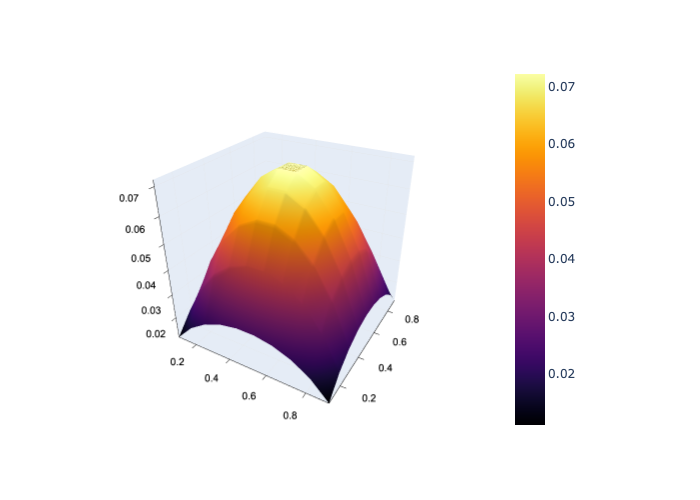

In [45]:
n = 10
m = 10
g(x, y) = 0.0
f(x, y) = -1.0

A, b = cartesian_poisson(n, m, f, g, dim_x=[0.0, 1.0], dim_y=[0.0, 1.0])
x = ldl(A) \ b
u = arrangement(x, m, n)

# Uniform grid of Ω with n × m points
Δx = 1 / (n + 1)
x = [i * Δx for i = 1 : n]

Δy = 1 / (m + 1)
y = [j * Δy for j = 1 : m]

xx, yy = meshgrid2(x, y)
surface(xx, yy, u)